In [7]:
import greenbutton
from greenbutton import parse

In [13]:
dataFilePath = "./src/data/415Ridgewood202XCelData.xml"

In [14]:
gbParsed = parse.parse_feed(dataFilePath)
gbParsed

[<UsagePoint (Usage Point)>]

In [18]:
dir(gbParsed)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [19]:
gbParsed.usagePoints

AttributeError: 'list' object has no attribute 'usagePoints'

In [20]:
parse.parse_feed(dataFilePath)

[<UsagePoint (Usage Point)>]

In [21]:
for up in gbParsed:
        print('UsagePoint (%s) %s %s:' % (up.title, up.serviceCategory.name, up.status))
        for mr in up.meterReadings:
            print('  Meter Reading (%s) %s:' % (mr.title, mr.readingType.uom.name))
            for ir in mr.intervalReadings:
                print('    %s, %s: %s %s' % (ir.timePeriod.start, ir.timePeriod.duration, ir.value, ir.value_symbol), end = '')
                if ir.cost is not None:
                    print(' (%s%s)' % (ir.cost_symbol, ir.cost))
                if len(ir.readingQualities) > 0:
                    print('[%s]' % ', '.join([rq.quality.name for rq in ir.readingQualities]))

UsagePoint (Usage Point) electricity None:
  Meter Reading (Meter Reading) wattHours:
    2000-01-01 06:00:00+00:00, 8740 days, 0:00:00: 0.0 Wh ($0.0)


In [24]:
gbParsed.meterReadings[0]

AttributeError: 'list' object has no attribute 'meterReadings'

In [23]:
gbParsed

[<UsagePoint (Usage Point)>]

In [28]:
for up in gbParsed:
        print('UsagePoint', up.meterReadings)
        

UsagePoint {<MeterReading (Meter Reading)>}


In [29]:
import pandas as pd

In [30]:
csvFilePath = "./src/data/usage.csv"

In [47]:
kwhDf = pd.read_csv(csvFilePath, parse_dates=['Date'])
kwhDf

,Date,kWh
0,2022-01-23,531.000000
1,2022-02-22,567.000000
2,2022-03-23,286.000000
3,2022-04-21,131.000000
4,2022-05-22,118.000000
5,2022-06-21,262.000000
6,2022-07-21,479.000000
7,2022-08-21,394.000000
8,2022-09-20,308.000000
9,2022-10-19,127.000000


In [48]:
kwhDf.dtypes

Date    datetime64[ns]
kWh            float64
dtype: object

<Axes: xlabel='Date'>

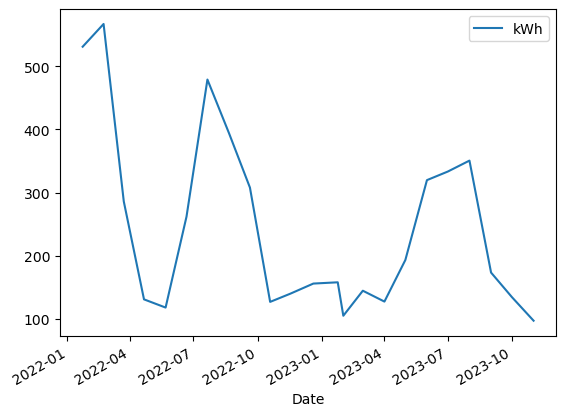

In [49]:
kwhDf.plot(kind='line', x='Date', y='kWh')